## Class : C550-T301 Data Mining (2241-1)
## Name : Rajib Samanta
### Assignment : Week 5

Download the labeled training dataset from this link: Bag of Words Meets Bags of Popcorn. 
    https://www.kaggle.com/competitions/word2vec-nlp-tutorial/data
    
1. Get the stemmed data using the same process you did in Week 3.
2. Split this into a training and test set.
3. Fit and apply the tf-idf vectorization to the training set.
4. Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).
5. Train a logistic regression using the training data.
6. Find the model accuracy on test set.
7. Create a confusion matrix for the test set predictions.
8. Get the precision, recall, and F1-score for the test set predictions.
9. Create a ROC curve for the test set.
10. Pick another classification model you learned about this week and repeat steps (5) – (9).

In [31]:
# Import Libraries
import pandas as pd
import os
#pip install textblob
from textblob import TextBlob
# pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
# pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

In [6]:
# Read the labeled training dataset  file ('labeledTrainData.tsv') from local:
directory = '/Users/rajibsamanta/Documents/Rajib/College/Sem6_fall_2023/Week5' 
# Set the working directory
os.chdir(directory)
print(os.getcwd())
# 1. Import the movie review data as a data frame and ensure that the data is loaded properly.

file_name = "labeledTrainData.tsv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_name, delimiter='\t', quoting=3)

# Display few records.
df.head()

/Users/rajibsamanta/Documents/Rajib/College/Sem6_fall_2023/Week5


,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [7]:
# Convert the 'review' column to lowercase
df['review'] = df['review'].str.lower()

# Print the first few rows of the DataFrame to verify the conversion
print(df[['review']].head())

                                              review
0  "with all this stuff going down at the moment ...
1  "\"the classic war of the worlds\" by timothy ...
2  "the film starts with a manager (nicholas bell...
3  "it must be assumed that those who praised thi...
4  "superbly trashy and wondrously unpretentious ...


In [8]:
# Function to remove punctuation and special characters


def remove_punctuation(text):
    # Define a regular expression pattern to match non-alphanumeric characters
    pattern = r'[^a-zA-Z0-9\s]'
    
    # Use the re.sub() function to replace matched characters with an empty string
    return re.sub(pattern, '', text)

# Apply the remove_punctuation function to the 'review' column
df['review'] = df['review'].apply(remove_punctuation)

# Print the first few rows of the DataFrame to verify the removal of punctuation
print(df.head())

         id  sentiment                                             review
0  "5814_8"          1  with all this stuff going down at the moment w...
1  "2381_9"          1  the classic war of the worlds by timothy hines...
2  "7759_3"          0  the film starts with a manager nicholas bell g...
3  "3630_4"          0  it must be assumed that those who praised this...
4  "9495_8"          1  superbly trashy and wondrously unpretentious 8...


In [10]:
# Remove stop words.
# Download NLTK stop words
nltk.download('stopwords')
# Function to remove stop words
def remove_stopwords(text):
    # Tokenize the text into words
    words = text.split()
    
    # Remove stop words
    stop_words = set(stopwords.words("english"))

    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the filtered words back into a single string
    return " ".join(filtered_words)

#print(stop_words)
# Apply the remove_stopwords function to the 'review' column
df['review'] = df['review'].apply(remove_stopwords)

# Print the first few rows of the DataFrame to verify the removal of stop words
print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajibsamanta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


         id  sentiment                                             review
0  "5814_8"          1  stuff going moment mj ive started listening mu...
1  "2381_9"          1  classic war worlds timothy hines entertaining ...
2  "7759_3"          0  film starts manager nicholas bell giving welco...
3  "3630_4"          0  must assumed praised film greatest filmed oper...
4  "9495_8"          1  superbly trashy wondrously unpretentious 80s e...


In [11]:
# Apply NLTK’s PorterStemmer.

# Download NLTK stop words and initialize the Porter Stemmer
nltk.download('stopwords')
stemmer = PorterStemmer()


# Function to remove punctuation, remove stop words, and apply stemming
def preprocess_and_stem(text):
    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenize the text into words
    words = text.split()
    
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Apply stemming using the Porter Stemmer
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    # Join the stemmed words back into a single string
    return " ".join(stemmed_words)

# Apply the preprocess_and_stem function to the 'review' column
df['review'] = df['review'].apply(preprocess_and_stem)

# Print the first few rows of the DataFrame to verify the preprocessing and stemming
print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajibsamanta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


         id  sentiment                                             review
0  "5814_8"          1  stuff go moment mj ive start listen music watc...
1  "2381_9"          1  classic war world timothi hine entertain film ...
2  "7759_3"          0  film start manag nichola bell give welcom inve...
3  "3630_4"          0  must assum prais film greatest film opera ever...
4  "9495_8"          1  superbl trashi wondrous unpretenti 80 exploit ...


In [12]:
# describe dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [13]:
# 2. Split this into a training and test set.


# Load your dataset into a pandas DataFrame

# Define the features (X) and the target (y)
X = df['review']  # Feature: the 'review' column
y = df['sentiment']  # Target: the 'sentiment' column

# Split the dataset into a training set and a test set (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets to verify the split
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (20000,) (20000,)
Test set shape (X_test, y_test): (5000,) (5000,)


In [16]:
# 3. Fit and apply the tf-idf vectorization to the training set.

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the TF-IDF vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Apply the same TF-IDF vectorizer to the test data
#--> Applying it to the test data using transform ensures that the TF-IDF representation of the test data is consistent
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print the shapes of the TF-IDF matrices for training and test sets
print("TF-IDF Matrix (Training Set) Shape:", X_train_tfidf.shape)
print("TF-IDF Matrix (Test Set) Shape:", X_test_tfidf.shape)

TF-IDF Matrix (Training Set) Shape: (20000, 80683)
TF-IDF Matrix (Test Set) Shape: (5000, 80683)


##### 4. Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).
* When applying TF-IDF vectorization to the test set, we should not fit the vectorizer again.The purpose of using the same vectorizer that was fit on the training set is to maintain consistency between the two sets. By applying the same vectorizer to both sets, we ensure that the features (words or terms) and their corresponding TF-IDF values are consistent between the training and test sets.

In [19]:
# 5. Train a logistic regression using the training data.
# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()
# Train the Logistic Regression model on the training data
logistic_regression_model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [20]:
# 6. Find the model accuracy on test set.
# Predict sentiment on the test data
y_pred = logistic_regression_model.predict(X_test_tfidf)

# Calculate and print the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8872


* Accuracy Score is 0.8872 close to 1 , its means regression model is significant.

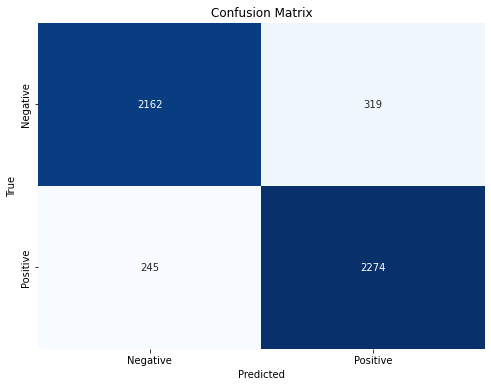

In [23]:
# 7. Create a confusion matrix for the test set predictions.
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# 8. Get the precision, recall, and F1-score for the test set predictions.
# Calculate precision, recall, and F1-score and print the classification report
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.87      0.88      2481
    Positive       0.88      0.90      0.89      2519

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



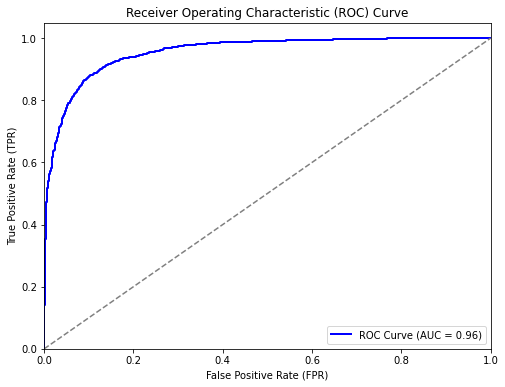

In [30]:
9. Create a ROC curve for the test set.
# Predict probabilities of positive class for the test data
y_prob = logistic_regression_model.predict_proba(X_test_tfidf)[:, 1]
# Calculate ROC curve values

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
# 10. Pick another classification model you learned about this week and repeat steps (5) – (9).

##--> Use a Support Vector Machine (SVM) classifier for sentiment analysis on the same dataset and repeat steps (5) to (9) using the SVM classifier.
# Initialize the SVM Classifier model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM Classifier model on the training data
svm_model.fit(X_train_tfidf, y_train)

# Predict sentiment on the test data
y_pred = svm_model.predict(X_test_tfidf)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision, recall, and F1-score
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", classification_rep)


Accuracy: 0.8896
Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      2481
    Positive       0.88      0.90      0.89      2519

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



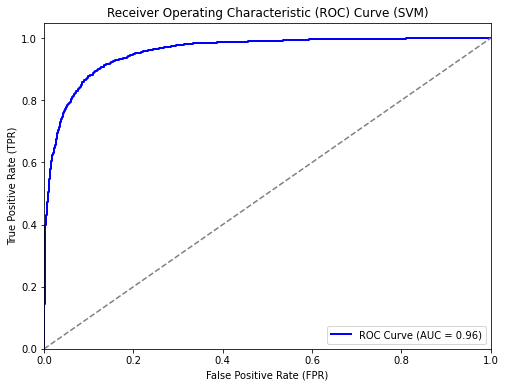

In [34]:
# Create a ROC curve for the test set.
# Predict the decision function for the test data
decision_function = svm_model.decision_function(X_test_tfidf)

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, decision_function)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, decision_function)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc='lower right')
plt.show()